# Analysis III

**Objective:** 

To evaluate the value for money restaurants in the U.S.A (value for money refers to the restaurants with highest rating and lowest cost)

**Approach:**

Using pandas, splitting the multiple cuisines and stacking them up with the location,melting them with locality, grouping the locality and then country code and then forward sorting the average cost for two and reverse sorting the rating in the country with the names of the restaurants

**Deliverables:**

1. csv : **Analysis3.csv**
2. Basemap : **Value for money restaurants in the U.S.A**

In [1]:
import requests #import requests library
import json,os,re,datetime
import csv
import pandas as pd
from pandas import DataFrame
zomato_api_key=os.getenv('auth_key') # importing the key into the environment variable
path_to_folder="Raw_Data" #path to the destination folder
print(zomato_api_key)

b90e6a8c738410315a20c449fe2eb1b1


In [2]:
import pandas as pd #import pandas
from pandas import DataFrame #DataFrame

In [3]:
zomato=pd.read_csv('csv/zomato.csv',sep=',', encoding='latin-1') #read csv
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
zomato_new = zomato[zomato['Cuisines'].notnull()] # filtering out the null values from the data
zomato_new

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [9]:
cuisines = zomato_new['Cuisines'].apply(lambda x: pd.Series(x.split(','))) # splitting the column 'Cuisine' into multiple columns 
cuisines.columns=['Cuisine 1','Cuisine 2','Cuisine 3','Cuisine 4','Cuisine 5','Cuisine 6','Cuisines 7','Cuisine 8']# renaming the columns
cuisines.head()

,Cuisine 1,Cuisine 2,Cuisine 3,Cuisine 4,Cuisine 5,Cuisine 6,Cuisines 7,Cuisine 8
0,French,Japanese,Desserts,NaN,NaN,NaN,NaN,NaN
1,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Seafood,Asian,Filipino,Indian,NaN,NaN,NaN,NaN
3,Japanese,Sushi,NaN,NaN,NaN,NaN,NaN,NaN
4,Japanese,Korean,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
result = pd.concat([zomato, cuisines], axis=1) #concating the two dataframes 
result.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Rating text,Votes,Cuisine 1,Cuisine 2,Cuisine 3,Cuisine 4,Cuisine 5,Cuisine 6,Cuisines 7,Cuisine 8
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Excellent,314,French,Japanese,Desserts,NaN,NaN,NaN,NaN,NaN
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Excellent,591,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Very Good,270,Seafood,Asian,Filipino,Indian,NaN,NaN,NaN,NaN
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Excellent,365,Japanese,Sushi,NaN,NaN,NaN,NaN,NaN,NaN
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Excellent,229,Japanese,Korean,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
locality=pd.DataFrame(result[['Locality Verbose','Cuisine 1','Cuisine 2','Cuisine 3','Cuisine 4','Cuisine 5','Cuisine 6','Cuisines 7','Cuisine 8']])
locality_stack=pd.DataFrame(locality.stack()) #stacking the columns 
locality.head()

,Locality Verbose,Cuisine 1,Cuisine 2,Cuisine 3,Cuisine 4,Cuisine 5,Cuisine 6,Cuisines 7,Cuisine 8
0,"Century City Mall, Poblacion, Makati City, Mak...",French,Japanese,Desserts,NaN,NaN,NaN,NaN,NaN
1,"Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",Seafood,Asian,Filipino,Indian,NaN,NaN,NaN,NaN
3,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",Japanese,Sushi,NaN,NaN,NaN,NaN,NaN,NaN
4,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",Japanese,Korean,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
keys = [c for c in locality  if c.startswith('Cuisine')]
a=pd.melt(locality, id_vars='Locality Verbose', value_vars=keys, value_name='Cuisines') #melting the stack into one row
max_rate=pd.DataFrame(a.groupby(by=['Locality Verbose','variable','Cuisines']).size().reset_index()) #find the highest restuarant in the city

del max_rate['variable']
max_rate.columns=['Locality Verbose','Cuisines','Count']
max_rate.head()

,Locality Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"ILD Trade Centre Mall, Sohna Road, Gurgaon",North Indian,1
2,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Beverages,1
3,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Mughlai,1
4,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1


In [13]:
loc=max_rate.sort('Count', ascending=False).groupby(by=['Locality Verbose'],as_index=False).first() #find the highest restuarant in the city
loc.head()

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Locality Verbose,Cuisines,Count
0,"ILD Trade Centre Mall, Sohna Road, Gurgaon",Cafe,1
1,"12th Square Building, Banjara Hills, Hyderabad",Mughlai,1
2,"A Hotel, Gurdev Nagar, Ludhiana",Chinese,1
3,"ARSS Mall, Paschim Vihar, New Delhi",North Indian,1
4,"Aaya Nagar, New Delhi",Cuisine Varies,1


In [19]:
rating_resUS=loc.merge(zomato,left_on='Locality Verbose',right_on='Locality Verbose',how='inner') #inner join to merge the two dataframe
rating_resUS=rating_resUS[rating_resUS['Country Code']==216]
rating_resturantUS=pd.DataFrame(rating_resUS[['Country Code','City','Locality Verbose','Cuisines_x','Count','Latitude','Longitude','Aggregate rating','Average Cost for two','Restaurant Name']])
rating_restaurantUS=rating_resturantUS.sort('Average Cost for two', ascending=True).groupby(by=['City','Cuisines_x','Locality Verbose'],sort=False,as_index=False).first()
rating_restaurantUS.columns=['City','Cuisine','Locality Verbose','Country Code','Count','Latitude','Longitude','Aggregate rating','Average Cost for two','Restaurant Name']
rating_restaurantUS=rating_restaurantUS[rating_restaurantUS['Aggregate rating']>=4.5]
rating_restaurantUS= rating_restaurantUS[rating_restaurantUS["Average Cost for two"]>0]
rating_restaurantUS=rating_restaurantUS[rating_restaurantUS['Average Cost for two']<40]
ratres=rating_restaurantUS[5:12]
ratres.to_csv('csv/Analysis3.csv',index=False)

/Users/shrutimehta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


![title](img/Analysis3.png)

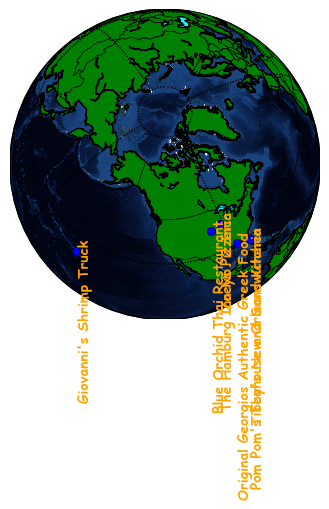

In [17]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
# don't plot features that are smaller than 1000 square km.
map = Basemap(projection='ortho', lat_0 = 70, lon_0 = -120,
              resolution = 'l', area_thresh = 10000.)
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'green',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)

# lat/lon coordinates of five cities.
lats = ratres['Latitude'].tolist()
lons = ratres['Longitude'].tolist()
rest=ratres['Restaurant Name'].tolist()
# compute the native map projection coordinates for cities.
x,y = map(lons,lats)
# plot filled circles at the locations of the cities.
map.plot(x,y,'bo')
# plot the names of those five cities.
for name,xpt,ypt in zip(rest,x,y):
    plt.text(xpt+50000,ypt+50000,name,rotation='vertical',weight='heavy',family='fantasy',va='baseline',zorder=10,style='oblique',color='orange',size='10')
map.drawmapboundary()
map.scatter(x,y)
map.bluemarble()
#mpl_toolkits.basemap.shiftgrid(lon0, datain, lonsin, start=True, cyclic=360.0)
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0, 360, 90))
map.drawparallels(np.arange(-90, 90, 60))
plt.show()

*Graph 3: Top Value for money Restaurants in the U.S.A *